In [ ]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

def crear_grafico_velas(ticker, fecha_inicio, fecha_fin, periodo_agrupacion='W'):
    """
    Crea un gráfico de velas para un activo financiero.

    Parámetros:
    ticker (str): Símbolo del activo (ej: 'AAPL')
    fecha_inicio (str): Fecha de inicio en formato 'YYYY-MM-DD'
    fecha_fin (str): Fecha de fin en formato 'YYYY-MM-DD'
    periodo_agrupacion (str): Período para agrupar los datos ('W' para semanal, 'M' para mensual)
    """
    try:
        # 1. Descargar datos
        data = yf.download(ticker, start=fecha_inicio, end=fecha_fin, progress=False)

        if data.empty:
            raise ValueError(f"No se encontraron datos para {ticker}")

        # Verificar y renombrar columnas si es necesario
        expected_columns = {
            'Close': 'Close',
            'High': 'High',
            'Low': 'Low',
            'Open': 'Open',
            'Volume': 'Volume'
        }

        # Crear un nuevo DataFrame con las columnas correctas
        new_data = pd.DataFrame(index=data.index)

        for old_col, new_col in expected_columns.items():
            if old_col in data.columns:
                new_data[new_col] = data[old_col]
            else:
                # Si no existe la columna, usar Adj Close como fallback
                if 'Close' in data.columns:
                    new_data[new_col] = data['Close']
                else:
                    raise ValueError(f"No se encontró la columna {old_col} ni Close")

        # Usar new_data en lugar de data
        data = new_data

        # 2. Crear columna de período
        data['Period'] = data.index.to_period(periodo_agrupacion)

        # 3. Agrupar datos
        grouped_data = data.groupby('Period').agg({
            'Open': 'first',
            'High': 'max',
            'Low': 'min',
            'Close': 'last',
            'Volume': 'sum'
        }).reset_index()

        # 4. Convertir período a datetime
        grouped_data['Period'] = grouped_data['Period'].apply(lambda x: x.start_time)

        # 5. Preparar datos para el gráfico
        ohlc = grouped_data[['Period', 'Open', 'High', 'Low', 'Close']]
        ohlc['Period'] = mdates.date2num(ohlc['Period'])

        # 6. Crear figura y ejes
        plt.style.use('dark_background')
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8),
                                      gridspec_kw={'height_ratios': [3, 1]})
        fig.subplots_adjust(hspace=0.3)

        # 7. Graficar velas
        candlestick_ohlc(ax1, ohlc.values, width=0.6,
                        colorup='#26a69a', colordown='#ef5350', alpha=0.8)

        # 8. Graficar volumen
        ax2.bar(grouped_data['Period'], grouped_data['Volume'],
                width=3, color='#2196f3', alpha=0.8)

        # 9. Formatear ejes
        for ax in [ax1, ax2]:
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
            ax.xaxis.set_major_locator(mdates.AutoDateLocator())
            ax.grid(alpha=0.3)
            plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

        # 10. Títulos y etiquetas
        periodo = 'Semanal' if periodo_agrupacion == 'W' else 'Mensual'
        ax1.set_title(f"Gráfico de Velas {periodo} - {ticker}",
                     fontsize=16, pad=20)
        ax1.set_ylabel("Precio", fontsize=12)
        ax2.set_ylabel("Volumen", fontsize=12)

        return fig

    except Exception as e:
        print(f"Error al crear el gráfico: {str(e)}")
        return None


<ipython-input-5-2129d4d6ed9d>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlc['Period'] = mdates.date2num(ohlc['Period'])


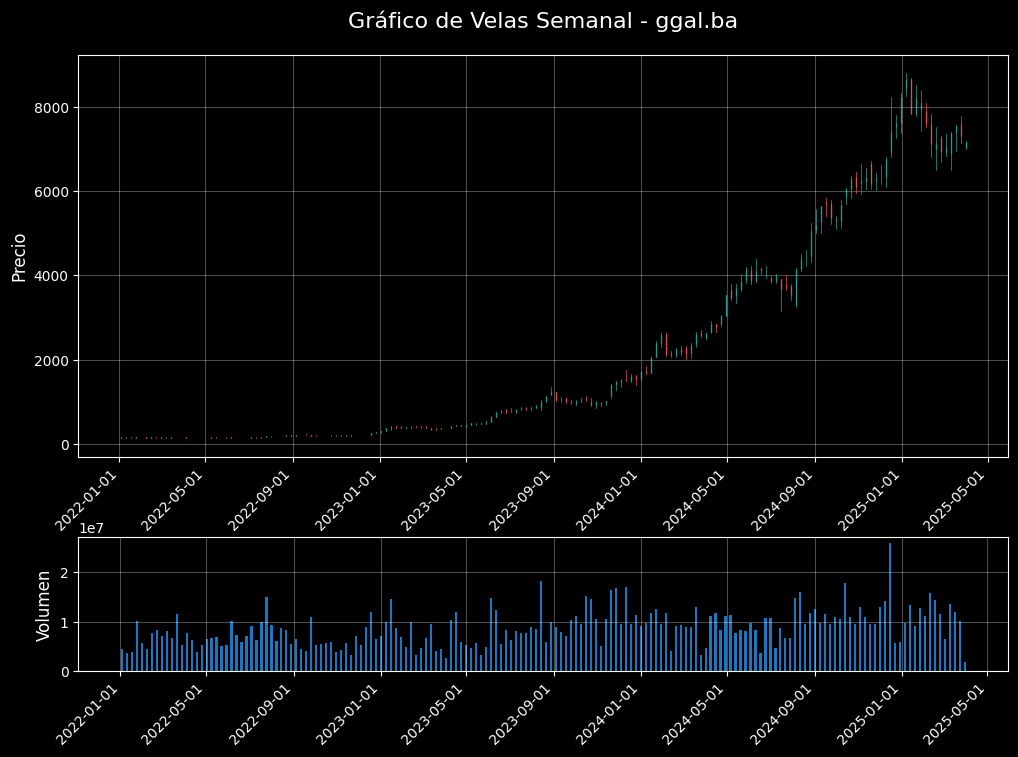

In [ ]:
crear_grafico_velas('ggal.ba', '2022-01-01', '2025-04-01', 'W').show()

<ipython-input-8-ed6cfecf2454>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlc['Period'] = mdates.date2num(ohlc['Period'])


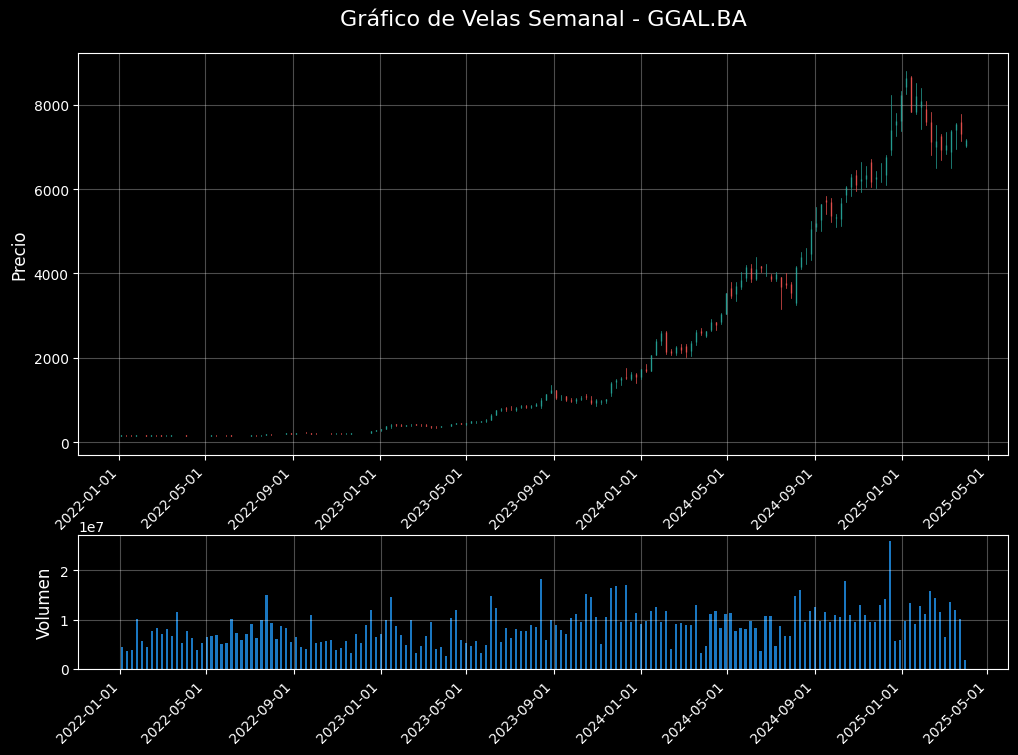

In [ ]:
try:
        # 1. Descargar datos
        data = yf.download("ggal.ba", start='2022-01-01', end='2025-04-01', progress=False)

        if data.empty:
            raise ValueError(f"No se encontraron datos para ggal")

        # Verificar y renombrar columnas si es necesario
        expected_columns = {
            'Close': 'Close',
            'High': 'High',
            'Low': 'Low',
            'Open': 'Open',
            'Volume': 'Volume'
        }

        # Crear un nuevo DataFrame con las columnas correctas
        new_data = pd.DataFrame(index=data.index)

        for old_col, new_col in expected_columns.items():
            if old_col in data.columns:
                new_data[new_col] = data[old_col]
            else:
                # Si no existe la columna, usar Adj Close como fallback
                if 'Close' in data.columns:
                    new_data[new_col] = data['Close']
                else:
                    raise ValueError(f"No se encontró la columna {old_col} ni Close")

        # Usar new_data en lugar de data
        data = new_data

        # 2. Crear columna de período
        data['Period'] = data.index.to_period("W")

        # 3. Agrupar datos
        grouped_data = data.groupby('Period').agg({
            'Open': 'first',
            'High': 'max',
            'Low': 'min',
            'Close': 'last',
            'Volume': 'sum'
        }).reset_index()

        # 4. Convertir período a datetime
        grouped_data['Period'] = grouped_data['Period'].apply(lambda x: x.start_time)

        # 5. Preparar datos para el gráfico
        ohlc = grouped_data[['Period', 'Open', 'High', 'Low', 'Close']]
        ohlc['Period'] = mdates.date2num(ohlc['Period'])

        # 6. Crear figura y ejes
        plt.style.use('dark_background')
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8),
                                      gridspec_kw={'height_ratios': [3, 1]})
        fig.subplots_adjust(hspace=0.3)

        # 7. Graficar velas
        candlestick_ohlc(ax1, ohlc.values, width=0.6,
                        colorup='#26a69a', colordown='#ef5350', alpha=0.8)

        # 8. Graficar volumen
        ax2.bar(grouped_data['Period'], grouped_data['Volume'],
                width=3, color='#2196f3', alpha=0.8)

        # 9. Formatear ejes
        for ax in [ax1, ax2]:
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
            ax.xaxis.set_major_locator(mdates.AutoDateLocator())
            ax.grid(alpha=0.3)
            plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

        # 10. Títulos y etiquetas
        periodo = 'Semanal'
        ax1.set_title(f"Gráfico de Velas {periodo} - GGAL.BA",
                     fontsize=16, pad=20)
        ax1.set_ylabel("Precio", fontsize=12)
        ax2.set_ylabel("Volumen", fontsize=12)

        plt.show()
except Exception as e:
        print(f"Error al crear el gráfico: {str(e)}")


